# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Zaki Zulhamlizar
- Email: zakizulham205@gmail.com
- Id Dicoding: Muhammad Zaki Zulhamlizar

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana tren penggunaan sepeda dalam beberapa bulan?
- 2. Bagaimana karaktertistik pengguna sepeda berdasarkan hari libur dan hari kerja?
- 3. Apakah terdapat korelasi antara suhu yang dirasakan pengguna (atemp) dan jumlah peminjam sepeda?
- 4. Apakah ada korelasi antara kelembapan udara (hum) dan penggunaan sepeda?

## Menyaipkan semua library yang dibuthkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membaca file CSV dan membuat DataFrame day dan hour

In [10]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

### Assessing Data

Menampilkan 5 baris pertama data untuk memahami struktur dan format day_df

In [11]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan informasi umum day_df

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menampilkan info tentang jumlah nilai yang hilang

In [13]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan info tentang jumlah nilai yang terduplikasi

In [14]:
day_df.duplicated().sum()

0

Menampilkan statistik deskriptif (jumlah, rata-rata, minimal, quartil 1-3, maksimal, dan standard deviasi)

In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menampilkan 5 baris pertama data untuk memahami struktur dan format hour_df

In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Menampilkan informasi umum hour_df

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menampilkan info tentang jumlah nilai yang hilang

In [18]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Menampilkan info tentang jumlah nilai yang terduplikasi

In [19]:
hour_df.duplicated().sum()

0

Menampilkan statistik deskriptif (jumlah, rata-rata, minimal, quartil 1-3, maksimal, dan standard deviasi)

In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Pada day_df dan hour_df variabel dteday masih dalam berbentuk object, maka ubah type datanya menjadi datetime

In [21]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore ...

Rangkuman parameter statistik day_df

In [22]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Jumlah pengguna sepeda untuk pengguna casual, terdaftar (registered), dan keduanya dalam 2 tahun

In [23]:
print("Jumlah pengguna sepeda untuk pengguna casual:", day_df['casual'].sum())
print("Jumlah pengguna sepeda untuk pengguna terdaftar:", day_df['registered'].sum())
print("Jumlah pengguna sepeda keseluruhan:", day_df['cnt'].sum())

Jumlah pengguna sepeda untuk pengguna casual: 620017
Jumlah pengguna sepeda untuk pengguna terdaftar: 2672662
Jumlah pengguna sepeda keseluruhan: 3292679


Demografi pengguna sepeda berdasarkan musim per tahun dan casual-terdaftar-keseluruhan

In [24]:
day_df.groupby(by=['yr',"season"]).agg({
    'casual': 'sum',
    'registered': 'sum',
    "cnt": 'sum'
})

casual  registered     cnt
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476

Demografi pengguna sepeda berdasarkan libur per bulan dan casual-terdaftar-keseluruhan

In [25]:
day_df.groupby(by=['mnth','holiday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    "cnt": 'sum'
})

casual  registered     cnt
mnth holiday                            
1    0         11464      118220  129684
     1           578        4671    5249
2    0         14266      132850  147116
     1           697        3539    4236
3    0         44444      184476  228920
4    0         58962      200636  259598
     1          1840        7656    9496
5    0         71179      250366  321545
     1          4106        6035   10141
6    0         73906      272436  346342
7    0         72530      258972  331502
     1          5627        7819   13446
8    0         72039      279155  351194
9    0         67122      269484  336606
     1          3201        6184    9385
10   0         57372      254385  311757
     1          2388        8207   10595
11   0         33551      207723  241274
     1          3052       10505   13557
12   0         20823      187883  208706
     1           870        1460    2330

Demografi pengguna sepeda berdasarkan libur per minggu dan casual-terdaftar-keseluruhan

In [26]:
day_df.groupby(by=['weekday','holiday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    "cnt": 'sum'
})

casual  registered     cnt
weekday holiday                            
0       0        140521      303506  444027
1       0         54024      341874  395898
        1         16760       42845   59605
2       0         57403      410693  468096
        1           440         573    1013
3       0         54757      410888  465645
        1          2562        4841    7403
4       0         59945      421530  481475
        1          1515        2405    3920
5       0         77156      404140  481296
        1          1082        5412    6494
6       0        153852      323955  477807

Demografi pengguna sepeda berdasarkan cuaca dan casual-terdaftar-keseluruhan

In [27]:
day_df.groupby(by='weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    "cnt": 'sum'
})

,casual,registered,cnt
weathersit,,,
1,446346,1811606,2257952
2,169776,827082,996858
3,3895,33974,37869


Eksplorasi hour_df

In [28]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Pengguna sepeda berdasarkan lama meminjam (jam)

In [29]:
hour_df.groupby(by='hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    "cnt": 'sum'
})

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


Menggabungkan hour df dan day df menjadi all df dengan merge left

In [30]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how='left',
    left_on='dteday',
    right_on='dteday'
)

## Visualization & Explanatory Analysis

### Bagaimana tren perubahan penggunaan sepeda sepanjang musim?

Mengambil sample dari data perbulan

In [31]:
monthly_df = all_df.resample(rule='M', on = 'dteday').agg({
    'casual_x': 'sum',
    'registered_x': 'sum',
    'cnt_x': 'sum'
})
monthly_df

,casual_x,registered_x,cnt_x
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821
2011-06-30,30612,112900,143512
2011-07-31,36452,104889,141341
2011-08-31,28842,107849,136691
2011-09-30,26545,100873,127418


Memvisualisasikan dengan line chart tren per bulan

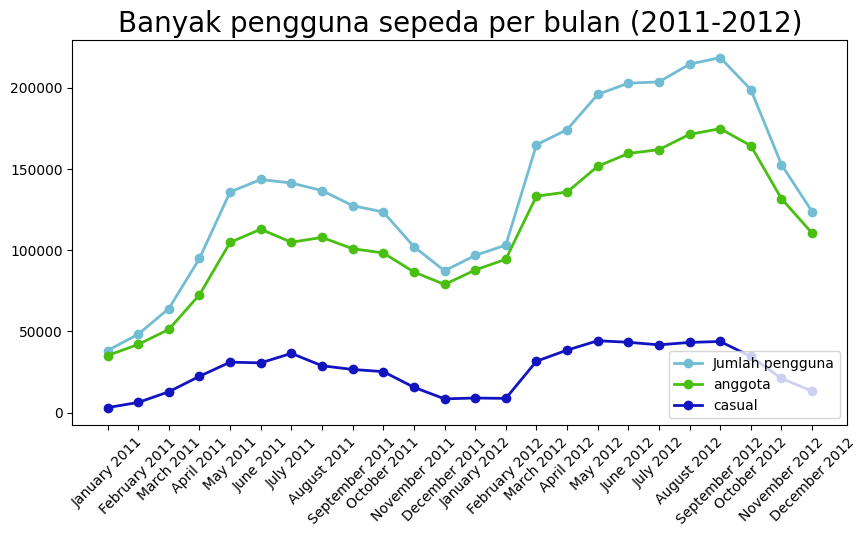

In [32]:
monthly_df.index = monthly_df.index.strftime('%B %Y') #mengubah format order date menjadi nama bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    'casual_x': 'casual',
    'registered_x': 'anggota',
    "cnt_x": "jumlah pengguna"
}, inplace=True)
 
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_df["dteday"], monthly_df["jumlah pengguna"], marker='o', linewidth=2, color="#72BCD4")
plt.plot(monthly_df["dteday"], monthly_df["anggota"], marker='o', linewidth=2, color="#48bf11")
plt.plot(monthly_df["dteday"], monthly_df["casual"], marker='o', linewidth=2, color="#1114bf")
plt.legend(["Jumlah pengguna", "anggota","casual"], loc ="lower right") 
plt.title("Banyak pengguna sepeda per bulan (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=10) 
plt.show()

Banyak informasi yang dapat diambil, seperti bisa dilihat bahwa musim panas tahun 2011, pengguna sharing bicycle memiliki puncak tertinggi untuk tahun 2011, sementara mengalami penurunan pada musim dingin, lalu kembali naik pada musim panas tahun 2012 dan memiliki puncak tertinggi pada musim gugur 2012 serta kembali menurun lagi pada musim dingin 2012.

Sekarang, kita akan melihat bagaimana karakteristik pengguna sharing bicycle. 

### Bagaimana karaktertistik pengguna sepeda berdasarkan hari libur dan hari kerja?

visualisasi total pengguna sepeda casual dan terdaftar

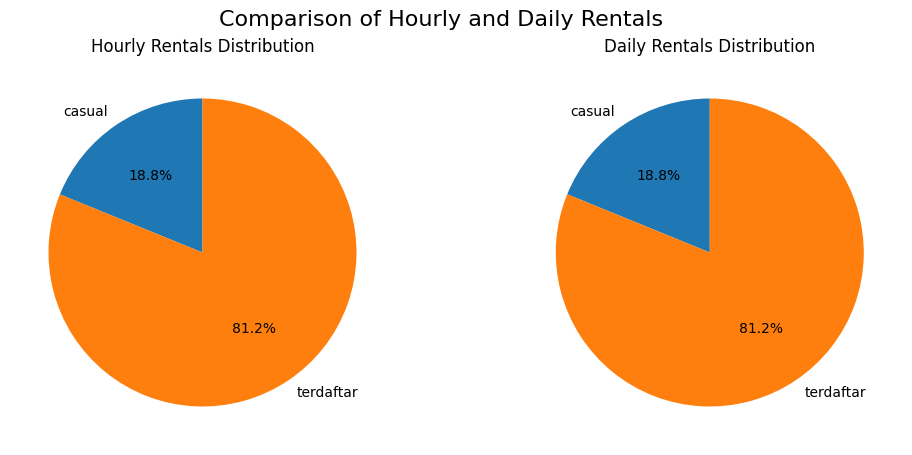

In [33]:
rent_hr_df = pd.DataFrame({
    'casual': [all_df['casual_y'].sum()],
    'terdaftar': [all_df['registered_y'].sum()]
})
rent_day_df = pd.DataFrame({
    'casual': [all_df['casual_x'].sum()],
    'terdaftar': [all_df['registered_x'].sum()]
})
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(rent_hr_df.iloc[0], labels=rent_hr_df.columns, autopct='%1.1f%%', startangle=90)
plt.title('Hourly Rentals Distribution')

plt.subplot(1, 2, 2)
plt.pie(rent_day_df.iloc[0], labels=rent_day_df.columns, autopct='%1.1f%%', startangle=90)
plt.title('Daily Rentals Distribution')

plt.suptitle('Comparison of Hourly and Daily Rentals', fontsize=16)
plt.show()

Visualisasi penjelasan karakteristik pengguna sepeda pada hari libur, hari kerja, dan akhir pekan

<Figure size 1200x600 with 0 Axes>

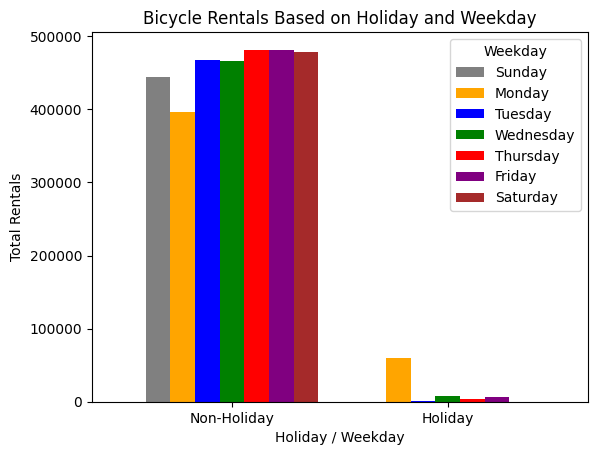

In [34]:
grouped_rentals = all_df.groupby(['holiday_x', 'weekday_x'])['cnt_x'].sum().unstack()
plt.figure(figsize=(12, 6))

grouped_rentals.plot(kind='bar', width=0.8, color=['gray', 'orange', 'blue', 'green', 'red', 'purple', 'brown'])
plt.title('Bicycle Rentals Based on Holiday and Weekday')
plt.xlabel('Holiday / Weekday')
plt.ylabel('Total Rentals')
plt.legend(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], title='Weekday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

Visualisasi rata-rata durasi peminjaman sepeda berdasarkan jam di hari kerja dan libur

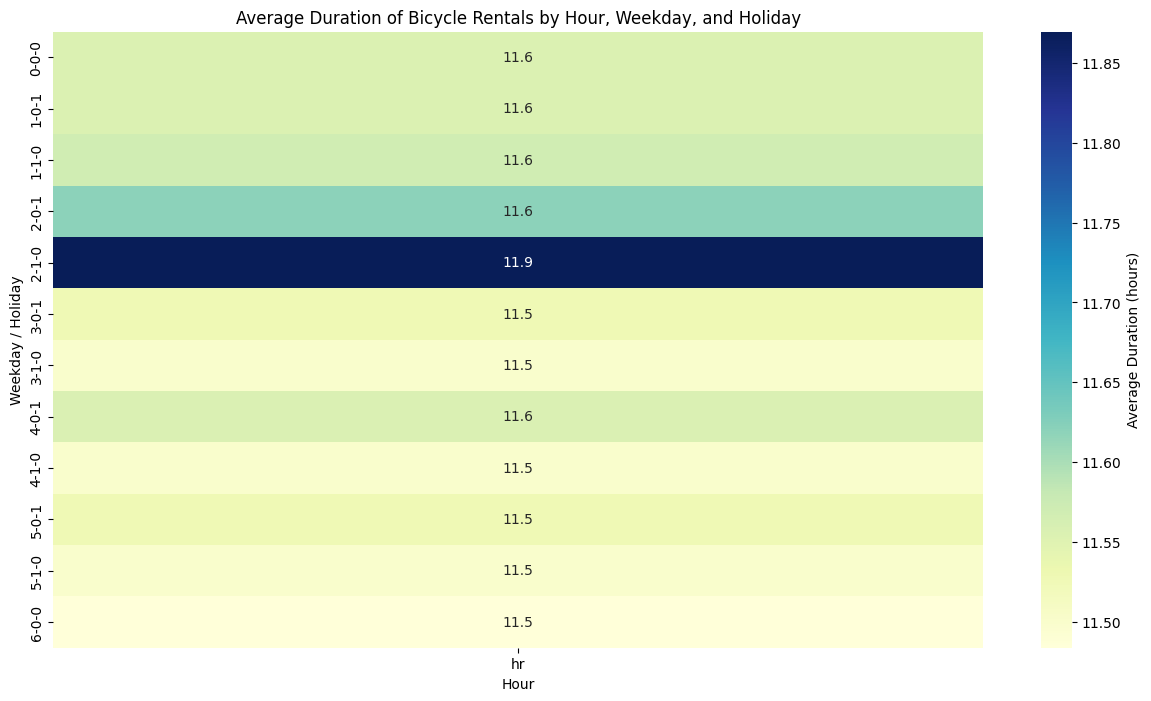

In [35]:
plt.figure(figsize=(15, 8))

pivot_table = all_df.pivot_table(values='hr', index=['weekday_x', 'holiday_x','workingday_x'], aggfunc='mean')

sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Average Duration (hours)'})
plt.title('Average Duration of Bicycle Rentals by Hour, Weekday, and Holiday')
plt.xlabel('Hour')
plt.ylabel('Weekday / Holiday')
plt.show()


Sekarang kita akan menggunakan teknis analisis statistika lanjutan yakni analisis korelasi

### Apakah terdapat korelasi antara suhu yang dirasakan pengguna (atemp) dan jumlah peminjam sepeda?

kita akan melihat visualisasi dengan scatter plot

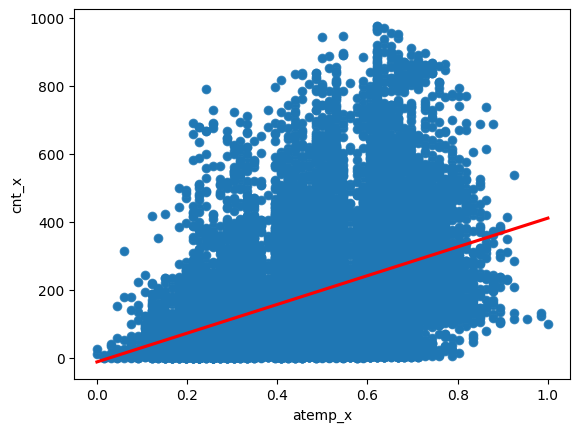

In [36]:
sns.scatterplot(x='atemp_x', y='cnt_x', data=all_df)
sns.regplot(x='atemp_x', y='cnt_x', data=all_df, ci=None, line_kws={"color": "red"})
plt.show()

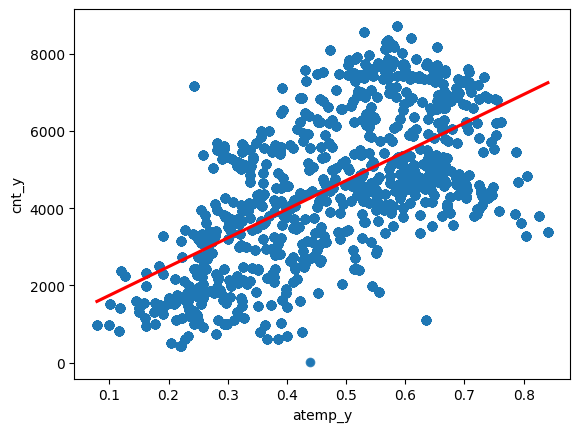

In [37]:
sns.scatterplot(x='atemp_y', y='cnt_y', data=all_df)
sns.regplot(x='atemp_y', y='cnt_y', data=all_df, ci=None, line_kws={"color": "red"})
plt.show()

Selanjutnya kita akan melihat bagaimana secara kuantitatif antara temperature yang dirasakan pengguna dan jumlah peminjam sepeda

In [38]:
all_df['atemp_x'].corr(all_df['cnt_x'])

0.4009293041266319

In [39]:
all_df['atemp_y'].corr(all_df['cnt_y'])

0.6290537604102987

### Apakah ada korelasi antara kelembapan udara (hum) dan penggunaan sepeda?

kita akan melihat visualisasi dengan scatter plot

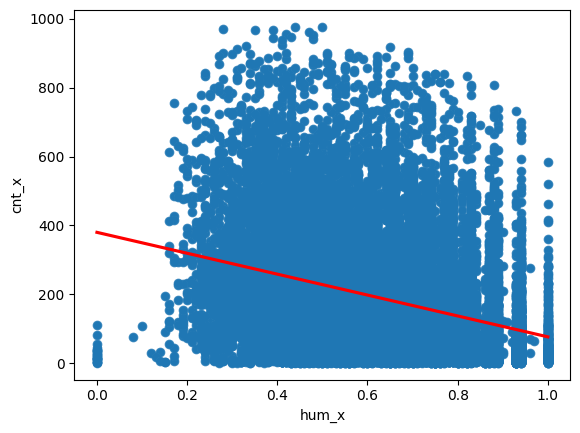

In [40]:
sns.scatterplot(x='hum_x', y='cnt_x', data=all_df)
sns.regplot(x='hum_x', y='cnt_x', data=all_df, ci=None, line_kws={"color": "red"})
plt.show()

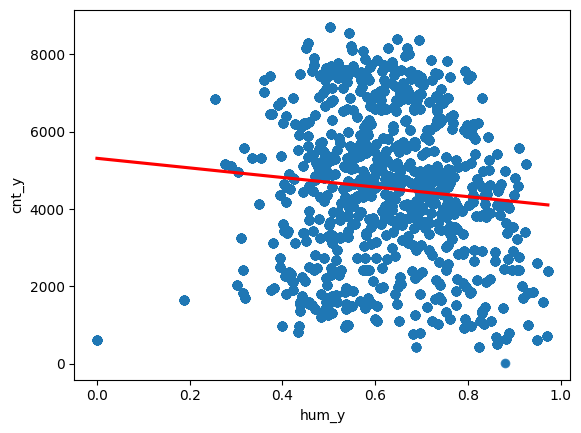

In [41]:
sns.scatterplot(x='hum_y', y='cnt_y', data=all_df)
sns.regplot(x='hum_y', y='cnt_y', data=all_df, ci=None, line_kws={"color": "red"})
plt.show()

Selanjutnya kita akan melihat bagaimana secara kuantitatif antara kelembapan yang dirasakan pengguna dan jumlah peminjam sepeda

In [42]:
all_df['hum_x'].corr(all_df['cnt_x'])

-0.3229107408245601

In [43]:
all_df['hum_y'].corr(all_df['cnt_y'])

-0.09165714029096629

## Conclusion

- Conclution pertanyaan 1: Bagaimana tren penggunaan sepeda dalam beberapa bulan?

Tren penggunaan sepeda dalam beberapa bulan seperti yang terlihat pada line chart di atas yaitu mengalami kenaikan dan penurunan yang dinamis. Line chart di atas juga menjelaskan bahwa kenaikan tiap tahun terjadi pada musim panas dan menurun kembali setelah musim gugur. Jumlah pengguna terbanyak terjadi pada bulan Agustus 2012, dan paling sedikit januari 2011. Line chart juga menjelaskan bahwa pada awal musim dingin terjadi penurunan.

- conclution pertanyaan 2: Bagaimana karaktertistik pengguna sepeda berdasarkan hari libur dan hari kerja?

Karakteristik pengguna sepeda didominasi oleh pengguna yang telah terdaftar dan lainnya casual. Mereka juga kerap kali menggunakan rent bicycle pada bukan hari raya. Namun, tertinggi peminjaman terjadi pada hari sabtu meskipun diikuti hari jumat, minggu, dan hari kerja lainnya. Pengguna juga memiliki rata-rata lama rental 12 jam.

- conclution pertanyaan 3: Apakah terdapat korelasi antara suhu yang dirasakan pengguna (atemp) dan jumlah peminjam sepeda?

Pada data per jam tidak ada korelasi antara suhu yang dirasakan pengguna dan jumlah peminjam sepeda yaitu menurut korelasi Pearson 40%. Namun, pada data per hari ada korelasi antara suhu yang dirasakan pengguna dan jumlah peminjam sepeda yaitu menurut korelasi Pearson 63%.

- conclution pertanyaan 4: Apakah ada korelasi antara kelembapan udara (hum) dan penggunaan sepeda?

Korelasi kelembapan udara dan pengguna sepeda tidak ada, baik itu data per jam maupun perhari, yaitu masing-masing korelasi pearson data per jam dan per hari ialah 32% dan 9%.